In [ ]:
from fitsio import FITS
import fitsio
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import numpy as np
import os
from matplotlib.pyplot import rcParams
import matplotlib._color_data as mcd
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 12

names = {name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}
colors = sorted(names, reverse=True)

# The results are run with picca_deltas.py function, with produce_delta_calib.txt,produce_delta_calib2.txt,produce_delta_LYA.txt as settings
## mock: EBOSS_v5_13_0
## number of iterations --nit 20

In [ ]:
dir_total = '/global/cscratch1/sd/tanting/picca_convergence/'

In [ ]:
dir_calib = dir_total+'Delta_20bins_data/Delta_calibration/Log'
dir_calib2 = dir_total+'Delta_20bins_data/Delta_calibration2/Log'
dir_LYA = dir_total+'Delta_20bins_data/Delta_LYA/Log'

In [ ]:
files_calib = [file for file in os.listdir(dir_calib) if file.startswith('delta_attributes_iteration')]
files_calib2 = [file for file in os.listdir(dir_calib2) if file.startswith('delta_attributes_iteration')]
files_LYA = [file for file in os.listdir(dir_LYA) if file.startswith('delta_attributes_iteration')]

In [ ]:
document_1 = FITS(dir_calib + '/' + files_LYA[0],vstorage='object')

print(document_1,document_1[2],document_1[3])

In [ ]:
document_calib = FITS(dir_calib + '/' + 'delta_attributes_iteration19.fits.gz',vstorage='object')

In [ ]:
document_calib 

In [ ]:
document_calib['WEIGHT']['eta'][:]

In [ ]:
loglam_calib = []
loglam_rest_calib = []
eta_calib = []
var_lss_calib = []
fudge_calib = []
mean_cont_calib = []

loglam_calib2 = []
loglam_rest_calib2 = []
eta_calib2 = []
var_lss_calib2 = []
fudge_calib2 = []
mean_cont_calib2 = []

loglam_LYA = []
loglam_rest_LYA = []
eta_LYA = []
var_lss_LYA = []
fudge_LYA = []
mean_cont_LYA = []

for index in range(19):
    document_calib = FITS(dir_calib + '/' + files_calib[index],vstorage='object')
    loglam_calib.append(document_calib['WEIGHT']['loglam'][:])
    loglam_rest_calib.append(document_calib['CONT']['loglam_rest'][:])
    eta_calib.append(document_calib['WEIGHT']['eta'][:])
    var_lss_calib.append(document_calib['WEIGHT']['var_lss'][:])
    fudge_calib.append(document_calib['WEIGHT']['fudge'][:])
    mean_cont_calib.append(document_calib['CONT']['mean_cont'][:])
    
    document_calib2 = FITS(dir_calib2 + '/' + files_calib2[index],vstorage='object')
    loglam_calib2.append(document_calib2['WEIGHT']['loglam'][:])
    loglam_rest_calib2.append(document_calib2['CONT']['loglam_rest'][:])
    eta_calib2.append(document_calib2['WEIGHT']['eta'][:])
    var_lss_calib2.append(document_calib2['WEIGHT']['var_lss'][:])
    fudge_calib2.append(document_calib2['WEIGHT']['fudge'][:])
    mean_cont_calib2.append(document_calib2['CONT']['mean_cont'][:])
    
    document_LYA = FITS(dir_LYA + '/' + files_LYA[index],vstorage='object')
    loglam_LYA.append(document_LYA['WEIGHT']['loglam'][:])
    loglam_rest_LYA.append(document_LYA['CONT']['loglam_rest'][:])
    eta_LYA.append(document_LYA['WEIGHT']['eta'][:])
    var_lss_LYA.append(document_LYA['WEIGHT']['var_lss'][:])
    fudge_LYA.append(document_LYA['WEIGHT']['fudge'][:])
    mean_cont_LYA.append(document_LYA['CONT']['mean_cont'][:])

# Comparison

In [ ]:
dir_compare_calib = dir_total+'Delta_20bins_data_jeanmarc_0.5/Delta_calibration/Log'
dir_compare_calib2 = dir_total+'Delta_20bins_data_jeanmarc_0.5/Delta_calibration2/Log'
dir_compare_LYA = dir_total+'Delta_20bins_data_jeanmarc_0.5/Delta_LYA/Log'

files_compare_calib = [file for file in os.listdir(dir_compare_calib) if file.startswith('delta_attributes_iteration')]
files_compare_calib2 = [file for file in os.listdir(dir_compare_calib2) if file.startswith('delta_attributes_iteration')]
files_compare_LYA = [file for file in os.listdir(dir_compare_LYA) if file.startswith('delta_attributes_iteration')]

loglam_compare_LYA = []
loglam_rest_compare_LYA = []
eta_compare_LYA = []
var_lss_compare_LYA = []
fudge_compare_LYA = []
mean_cont_compare_LYA = []

for index in range(19):
    document_compare_LYA = FITS(dir_LYA + '/' + files_LYA[index],vstorage='object')
    loglam_compare_LYA.append(document_compare_LYA['WEIGHT']['loglam'][:])
    loglam_rest_compare_LYA.append(document_compare_LYA['CONT']['loglam_rest'][:])
    eta_compare_LYA.append(document_compare_LYA['WEIGHT']['eta'][:])
    var_lss_compare_LYA.append(document_compare_LYA['WEIGHT']['var_lss'][:])
    fudge_compare_LYA.append(document_compare_LYA['WEIGHT']['fudge'][:])
    mean_cont_compare_LYA.append(document_compare_LYA['CONT']['mean_cont'][:])

# Plot the eta_LYA(lambda) for 20 iterations

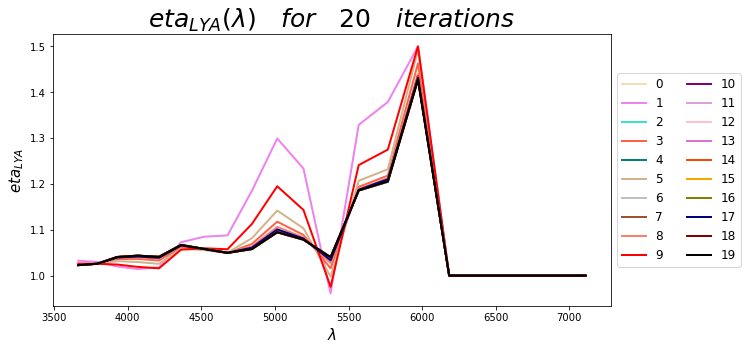

In [23]:
plt.figure()
plt.title(r'$eta_{LYA}(\lambda)\quad for\quad 20\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],eta_LYA[num],label = '%s'%num,color = color)
plt.plot(10**loglam_LYA[-1],eta_LYA[-1],label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$eta_{LYA}$')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

# Substract the eta_LYA(lambda) of each iteration by the last iteration, to see the convergence

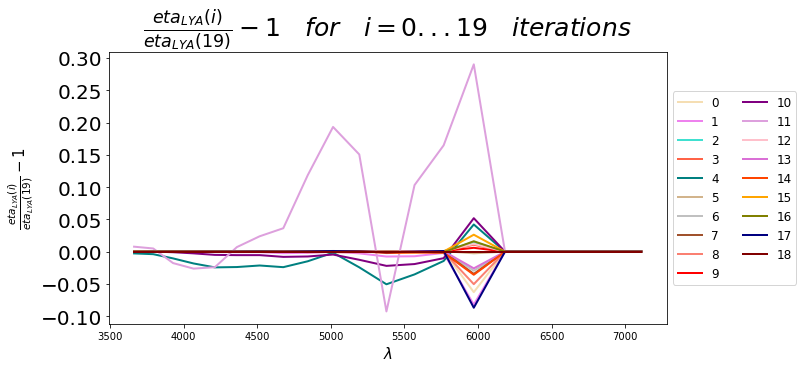

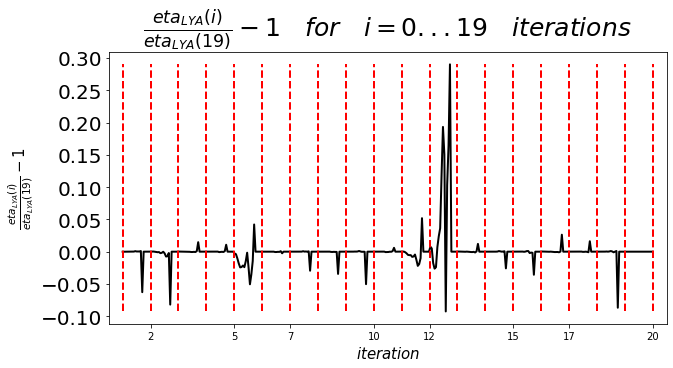

In [45]:
plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],eta_LYA[num]/eta_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],eta_LYA[-1]/eta_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_LYA).reshape(-1)/np.tile(eta_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

In [ ]:
plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_compare_LYA[num],eta_compare_LYA[num]/eta_compare_LYA[-1]-1,label = '%s'%num, color=color)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_compare_LYA).reshape(-1)/np.tile(eta_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

# Do the same analysis for varlss, fudge, mean_continuum

## varlss:

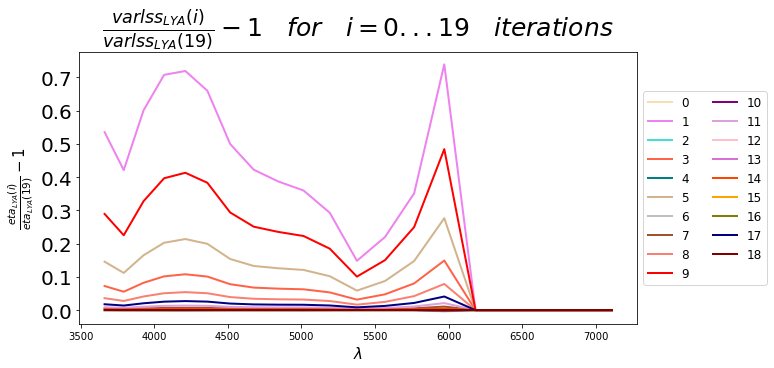

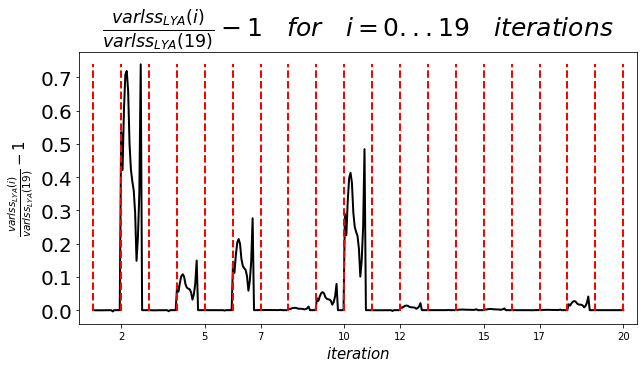

In [25]:
plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],var_lss_LYA[num]/var_lss_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],var_lss_LYA[-1]/var_lss_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_LYA).reshape(-1)/np.tile(var_lss_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

## fudge:

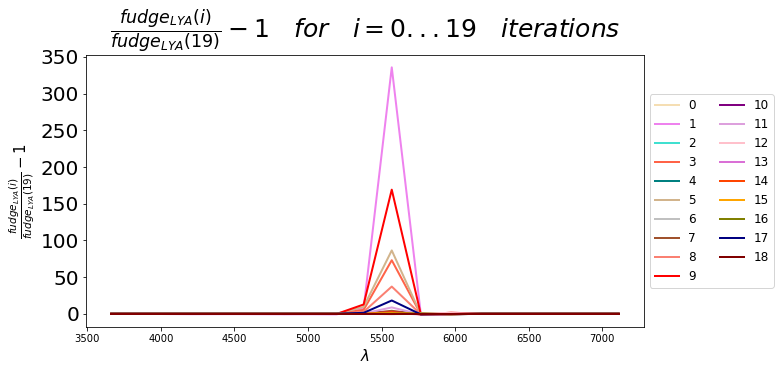

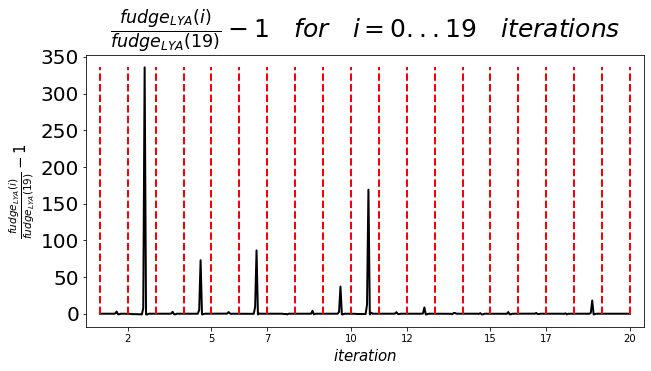

In [26]:
plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],fudge_LYA[num]/fudge_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],fudge_LYA[-1]/fudge_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_LYA).reshape(-1)/np.tile(fudge_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')

xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.yticks(fontsize=20)
plt.xlim(0.5,20.5)
plt.show()

## Mean_continuum

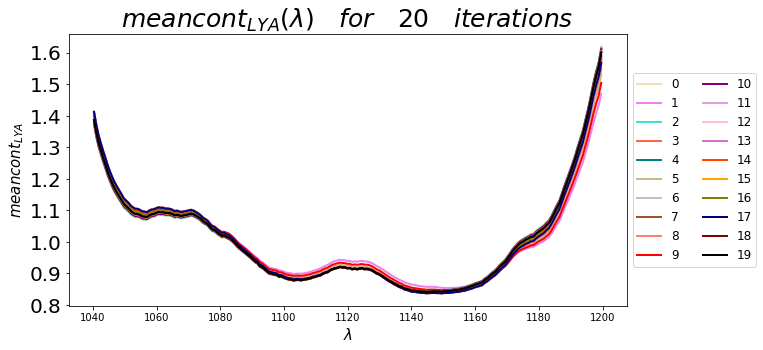

In [27]:
plt.figure()
plt.title(r'$meancont_{LYA}(\lambda)\quad for\quad 20\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_LYA[num],mean_cont_LYA[num],label = '%s'%num,color = color)
plt.plot(10**loglam_rest_LYA[-1],mean_cont_LYA[-1],label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$meancont_{LYA}$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

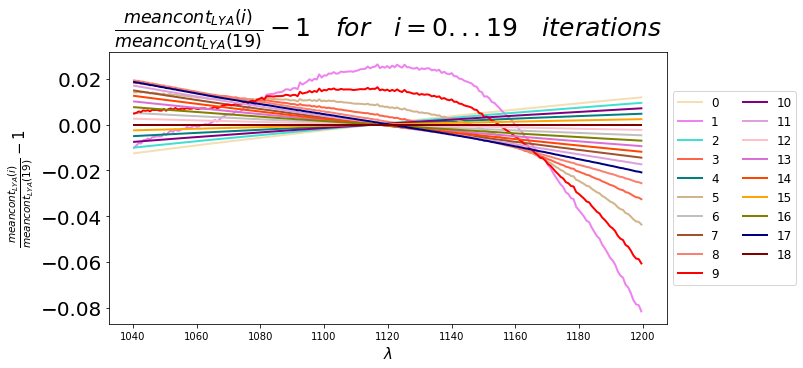

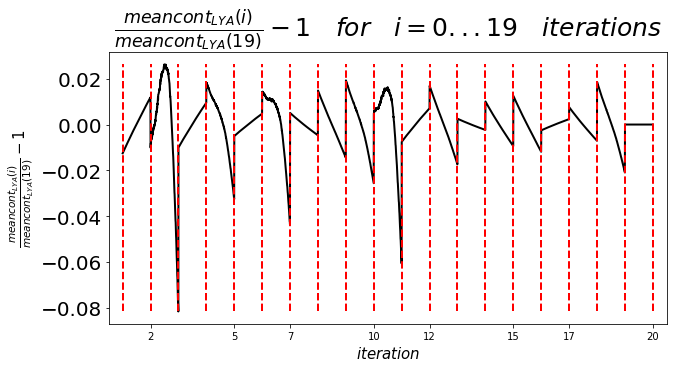

In [28]:
plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_LYA[num],mean_cont_LYA[num]/mean_cont_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_rest_LYA[-1],mean_cont_LYA[-1]/mean_cont_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_LYA).reshape(-1)/np.tile(mean_cont_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

# Appendice results for calib and calib2

## eta:

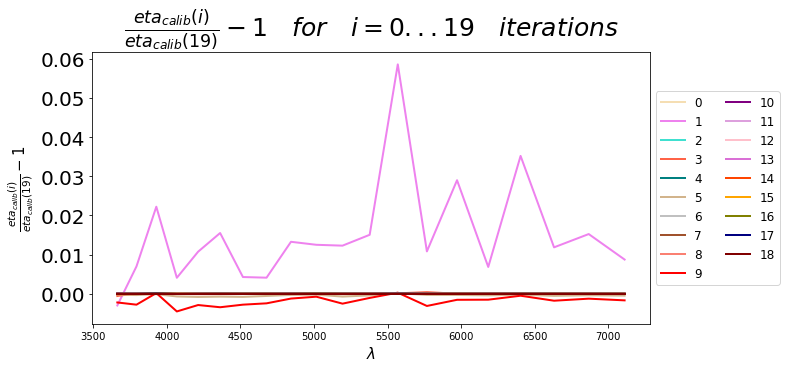

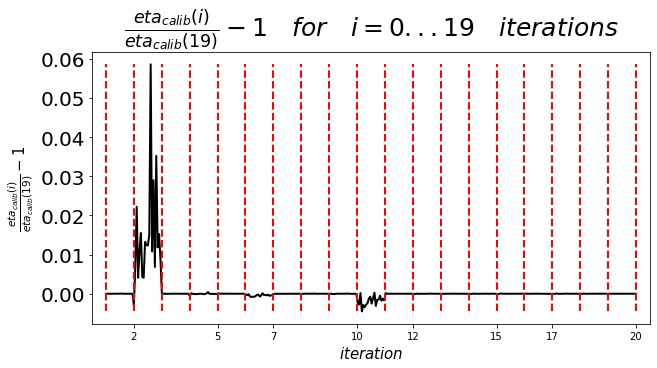

In [154]:
plt.figure()
plt.title(r'$\frac{eta_{calib}(i)}{eta_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib[num],eta_calib[num]/eta_calib[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib[-1],eta_calib[-1]/eta_calib[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{calib}(i)}{eta_{calib}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{calib}(i)}{eta_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_calib).reshape(-1)/np.tile(eta_calib[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_calib).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{calib}(i)}{eta_{calib}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

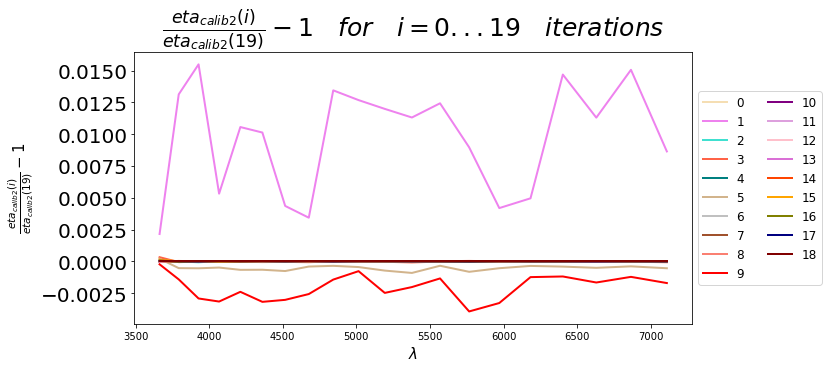

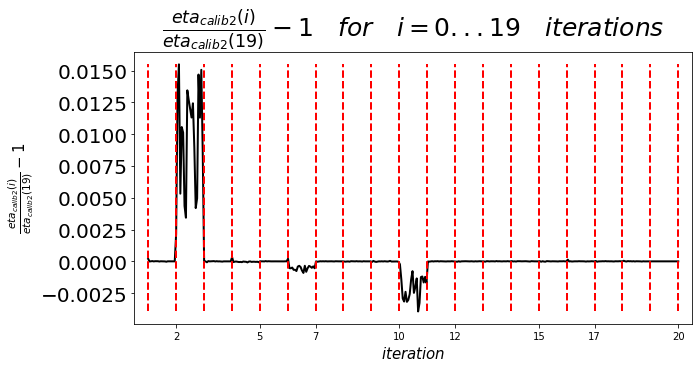

In [155]:
plt.figure()
plt.title(r'$\frac{eta_{calib2}(i)}{eta_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib2[num],eta_calib2[num]/eta_calib2[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib2[-1],eta_calib2[-1]/eta_calib2[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{calib2}(i)}{eta_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{calib2}(i)}{eta_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_calib2).reshape(-1)/np.tile(eta_calib2[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_calib2).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{calib2}(i)}{eta_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

## varlss:

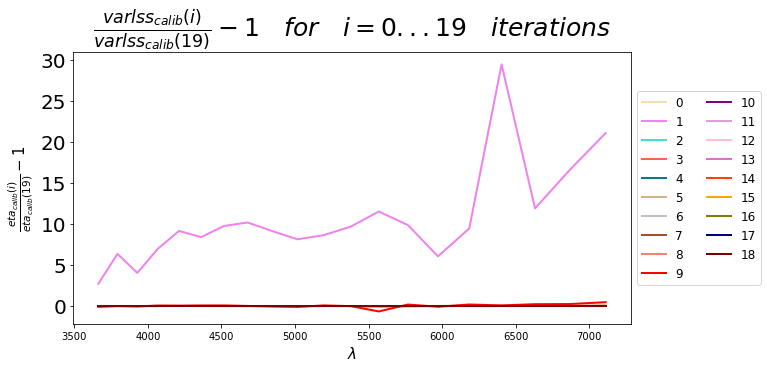

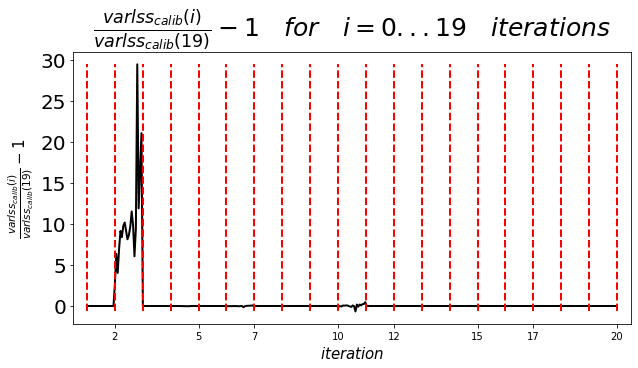

In [156]:
plt.figure()
plt.title(r'$\frac{varlss_{calib}(i)}{varlss_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib[num],var_lss_calib[num]/var_lss_calib[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib[-1],var_lss_calib[-1]/var_lss_calib[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{calib}(i)}{eta_{calib}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{varlss_{calib}(i)}{varlss_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_calib).reshape(-1)/np.tile(var_lss_calib[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_calib).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{calib}(i)}{varlss_{calib}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

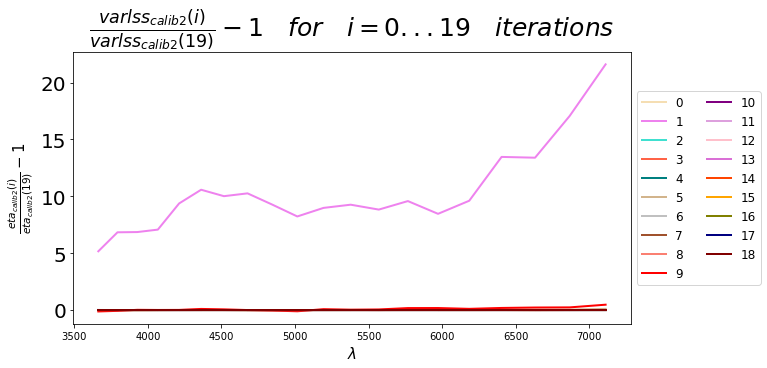

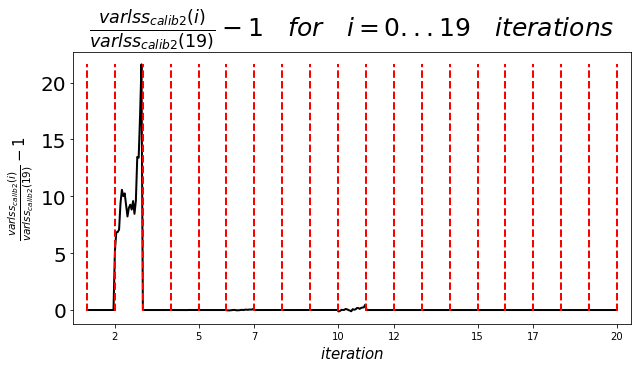

In [157]:
plt.figure()
plt.title(r'$\frac{varlss_{calib2}(i)}{varlss_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib2[num],var_lss_calib2[num]/var_lss_calib2[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib2[-1],var_lss_calib2[-1]/var_lss_calib2[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{calib2}(i)}{eta_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{varlss_{calib2}(i)}{varlss_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_calib2).reshape(-1)/np.tile(var_lss_calib2[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_calib2).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{calib2}(i)}{varlss_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

## fudge:

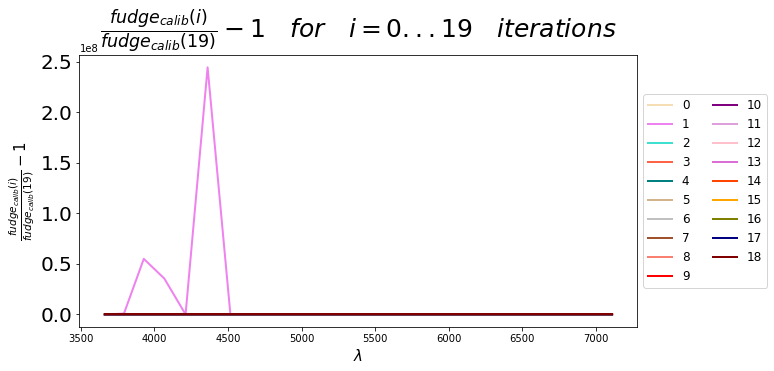

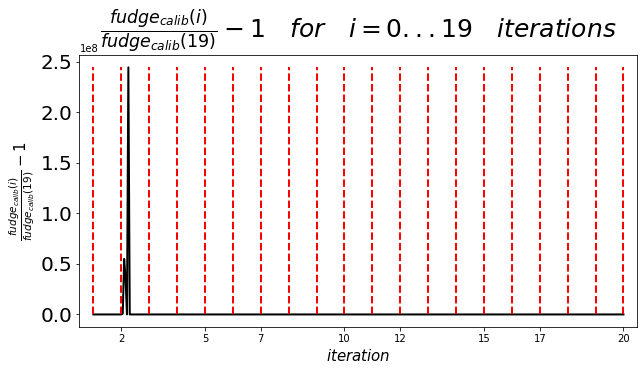

In [158]:
plt.figure()
plt.title(r'$\frac{fudge_{calib}(i)}{fudge_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib[num],fudge_calib[num]/fudge_calib[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib[-1],fudge_calib[-1]/fudge_calib[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{fudge_{calib}(i)}{fudge_{calib}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{fudge_{calib}(i)}{fudge_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_calib).reshape(-1)/np.tile(fudge_calib[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_calib).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{calib}(i)}{fudge_{calib}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

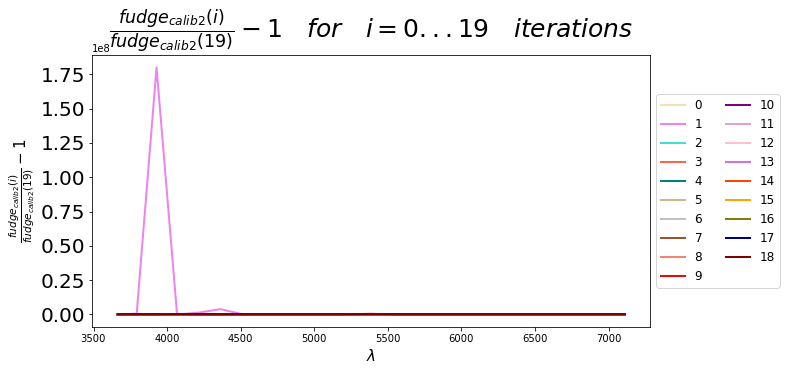

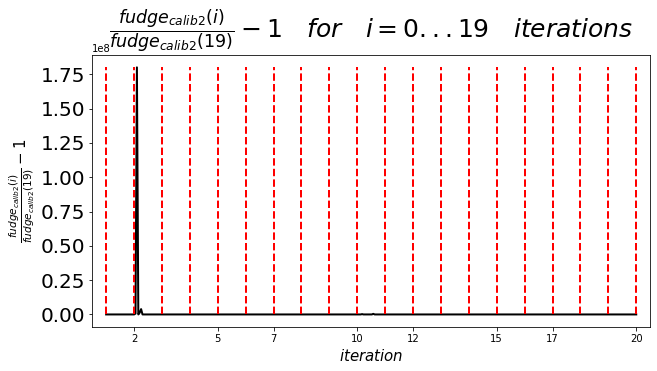

In [159]:
plt.figure()
plt.title(r'$\frac{fudge_{calib2}(i)}{fudge_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_calib2[num],fudge_calib2[num]/fudge_calib2[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_calib2[-1],fudge_calib2[-1]/fudge_calib2[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{fudge_{calib2}(i)}{fudge_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{fudge_{calib2}(i)}{fudge_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_calib2).reshape(-1)/np.tile(fudge_calib2[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_calib2).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{calib2}(i)}{fudge_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

## Mean_continuum

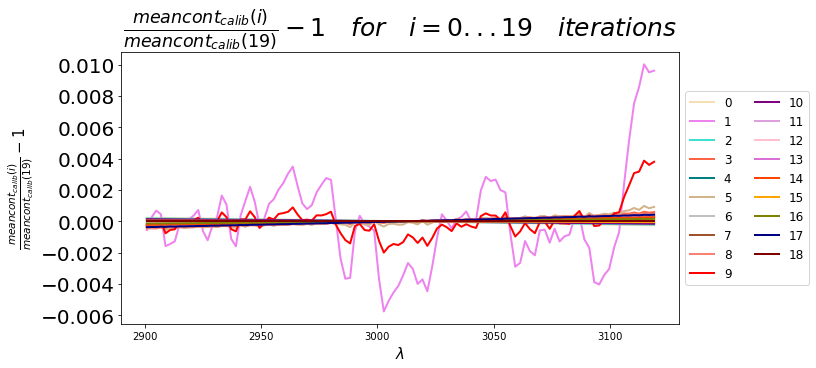

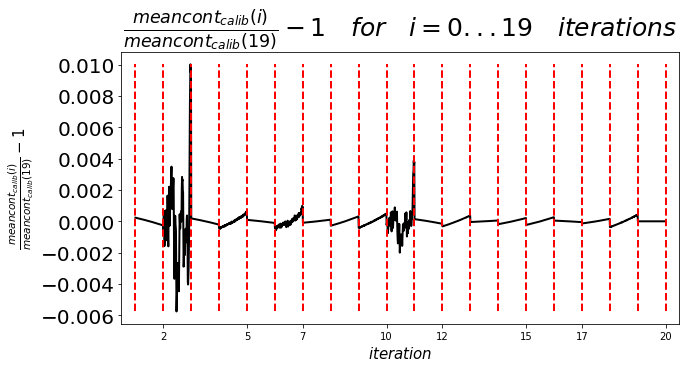

In [160]:
plt.figure()
plt.title(r'$\frac{meancont_{calib}(i)}{meancont_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_calib[num],mean_cont_calib[num]/mean_cont_calib[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_rest_calib[-1],mean_cont_calib[-1]/mean_cont_calib[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{meancont_{calib}(i)}{meancont_{calib}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{meancont_{calib}(i)}{meancont_{calib}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_calib).reshape(-1)/np.tile(mean_cont_calib[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_calib).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{calib}(i)}{meancont_{calib}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

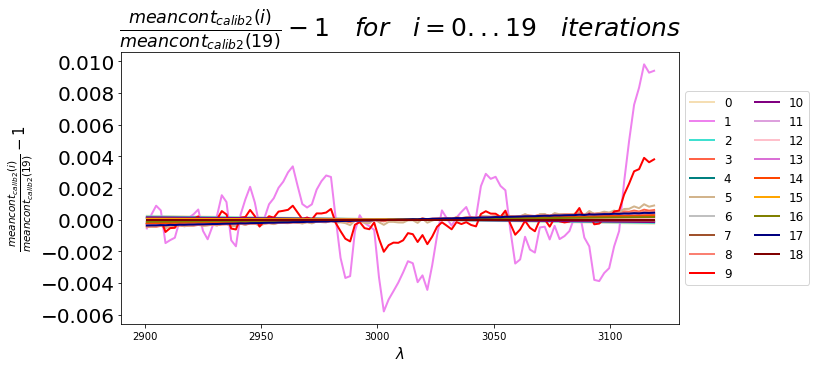

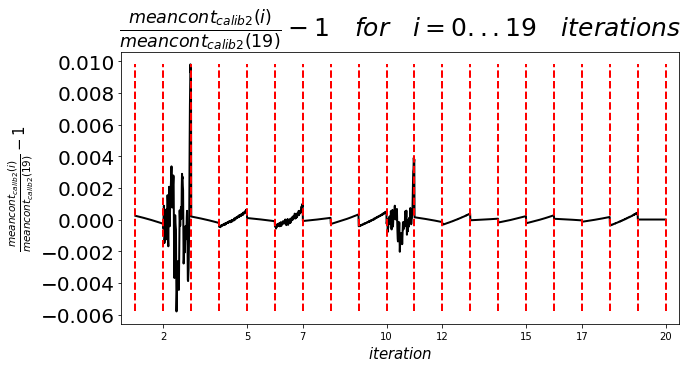

In [161]:
plt.figure()
plt.title(r'$\frac{meancont_{calib2}(i)}{meancont_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_calib2[num],mean_cont_calib2[num]/mean_cont_calib2[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_rest_calib2[-1],mean_cont_calib2[-1]/mean_cont_calib2[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{meancont_{calib2}(i)}{meancont_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{meancont_{calib2}(i)}{meancont_{calib2}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_calib2).reshape(-1)/np.tile(mean_cont_calib2[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_calib2).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{calib2}(i)}{meancont_{calib2}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()